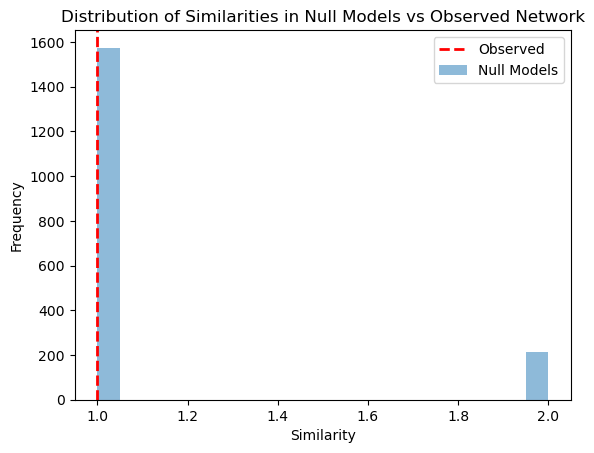

P-value: 1.0


In [12]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt

# Crear una red bipartita
# Nodo 0-2: Usuarios
# Nodo 3-7: Productos
edges = [(0, 3), (0, 4), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7)]
bipartite_graph = ig.Graph.Bipartite([0, 0, 0, 1, 1, 1, 1, 1], edges)
layout = bipartite_graph.layout_bipartite()

ig.plot(bipartite_graph, layout=layout, vertex_label=bipartite_graph.vs.indices)

# Proyección de la red bipartita en la capa de usuarios
types = bipartite_graph.vs['type']
user_projection, product_projection = bipartite_graph.bipartite_projection(multiplicity=True)

# Función personalizada para permutar aristas manteniendo la bipartición
def bipartite_edge_swap(graph, num_swaps=1):
    edges = graph.get_edgelist()
    for _ in range(num_swaps):
        # Seleccionar dos aristas aleatorias
        e1, e2 = random.sample(edges, 2)
        (u1, v1), (u2, v2) = e1, e2

        # Asegurarse de que se intercambien las aristas respetando la bipartición
        if graph.vs[u1]['type'] == graph.vs[u2]['type'] and graph.vs[v1]['type'] == graph.vs[v2]['type']:
            # Intercambiar aristas
            new_e1, new_e2 = (u1, v2), (u2, v1)
            if new_e1 not in edges and new_e2 not in edges:
                edges.remove(e1)
                edges.remove(e2)
                edges.append(new_e1)
                edges.append(new_e2)
                graph.delete_edges([e1, e2])
                graph.add_edges([new_e1, new_e2])
    return graph

# Función para generar modelos nulos
def generate_null_models(graph, num_permutations=100):
    null_models = []
    for _ in range(num_permutations):
        null_graph = graph.copy()
        null_graph = bipartite_edge_swap(null_graph, num_swaps=graph.ecount() * 10)
        null_models.append(null_graph)
    return null_models

# Generar redes nulas
null_models = generate_null_models(bipartite_graph, 1000)

# Función para calcular la similitud (número de vecinos comunes)
def calculate_similarity(graph, v1, v2):
    neighbors_v1 = set(graph.neighbors(v1))
    neighbors_v2 = set(graph.neighbors(v2))
    return len(neighbors_v1 & neighbors_v2)

# Calcular la similitud en la red observada
observed_similarities = []
for edge in user_projection.es:
    v1, v2 = edge.tuple
    similarity = calculate_similarity(bipartite_graph, v1, v2)
    observed_similarities.append(similarity)

# Calcular la similitud en las redes nulas
null_similarities = []
for null_graph in null_models:
    null_user_projection, _ = null_graph.bipartite_projection(multiplicity=True)
    for edge in null_user_projection.es:
        v1, v2 = edge.tuple
        similarity = calculate_similarity(null_graph, v1, v2)
        null_similarities.append(similarity)

# Comparar las similitudes
plt.hist(null_similarities, bins=20, alpha=0.5, label='Null Models')
plt.axvline(np.mean(observed_similarities), color='r', linestyle='dashed', linewidth=2, label='Observed')
plt.legend()
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Similarities in Null Models vs Observed Network')
plt.show()

# Calcular la significancia estadística
p_value = sum(np.array(null_similarities) >= np.mean(observed_similarities)) / len(null_similarities)
print(f'P-value: {p_value}')

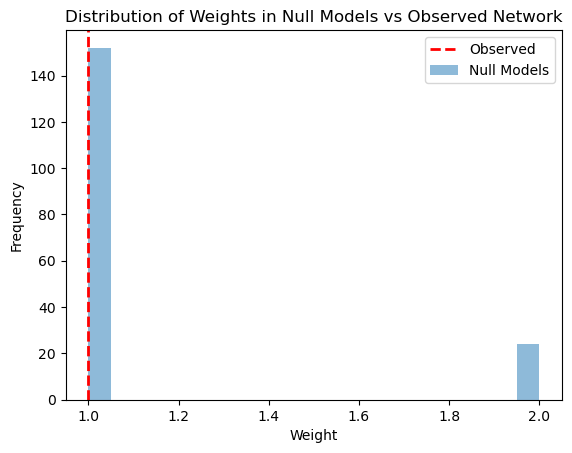

P-value: 1.0


In [13]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt

# Crear una red bipartita
# Nodo 0-2: Usuarios
# Nodo 3-7: Productos
edges = [(0, 3), (0, 4), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7)]
bipartite_graph = ig.Graph.Bipartite([0, 0, 0, 1, 1, 1, 1, 1], edges)
layout = bipartite_graph.layout_bipartite()

ig.plot(bipartite_graph, layout=layout, vertex_label=bipartite_graph.vs.indices)

# Proyección de la red bipartita en la capa de usuarios
types = bipartite_graph.vs['type']
user_projection, product_projection = bipartite_graph.bipartite_projection(multiplicity=True)

# Función personalizada para permutar aristas manteniendo la bipartición
def bipartite_edge_swap(graph, num_swaps=1):
    edges = graph.get_edgelist()
    for _ in range(num_swaps):
        # Seleccionar dos aristas aleatorias
        e1, e2 = random.sample(edges, 2)
        (u1, v1), (u2, v2) = e1, e2

        # Asegurarse de que se intercambien las aristas respetando la bipartición
        if graph.vs[u1]['type'] == graph.vs[u2]['type'] and graph.vs[v1]['type'] == graph.vs[v2]['type']:
            # Intercambiar aristas
            new_e1, new_e2 = (u1, v2), (u2, v1)
            if new_e1 not in edges and new_e2 not in edges:
                edges.remove(e1)
                edges.remove(e2)
                edges.append(new_e1)
                edges.append(new_e2)
                graph.delete_edges([e1, e2])
                graph.add_edges([new_e1, new_e2])
    return graph

# Función para generar modelos nulos
def generate_null_models(graph, num_permutations=100):
    null_models = []
    for _ in range(num_permutations):
        null_graph = graph.copy()
        null_graph = bipartite_edge_swap(null_graph, num_swaps=graph.ecount() * 10)
        null_models.append(null_graph)
    return null_models

# Generar redes nulas
null_models = generate_null_models(bipartite_graph, 100)

# Función para calcular la similitud (número de vecinos comunes)
def calculate_weighted_similarity(graph, v1, v2):
    neighbors_v1 = set(graph.neighbors(v1))
    neighbors_v2 = set(graph.neighbors(v2))
    common_neighbors = neighbors_v1 & neighbors_v2
    weight = sum(1 for _ in common_neighbors)
    return weight

# Calcular la similitud en la red observada
observed_weights = []
for edge in user_projection.es:
    v1, v2 = edge.tuple
    weight = calculate_weighted_similarity(bipartite_graph, v1, v2)
    observed_weights.append(weight)

# Calcular la similitud en las redes nulas
null_weights = []
for null_graph in null_models:
    null_user_projection, _ = null_graph.bipartite_projection(multiplicity=True)
    for edge in null_user_projection.es:
        v1, v2 = edge.tuple
        weight = calculate_weighted_similarity(null_graph, v1, v2)
        null_weights.append(weight)

# Comparar los pesos
plt.hist(null_weights, bins=20, alpha=0.5, label='Null Models')
plt.axvline(np.mean(observed_weights), color='r', linestyle='dashed', linewidth=2, label='Observed')
plt.legend()
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Weights in Null Models vs Observed Network')
plt.show()

# Calcular la significancia estadística
p_value = sum(np.array(null_weights) >= np.mean(observed_weights)) / len(null_weights)
print(f'P-value: {p_value}')
